In [1]:
from shapely import Point , LineString , LinearRing , Polygon

# 1、Polygons（多边形几何要素）：

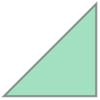

In [2]:
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon

### area、length属性：一个多边形具有非零的面积和非零的长度。

In [3]:
polygon.area , polygon.length

(0.5, 3.414213562373095)

### bounds属性它的边界是一个元组（minx, miny, maxx, maxy）。

In [4]:
polygon.bounds

(0.0, 0.0, 1.0, 1.0)

### 内环和外环可以通过exterior和interiors属性进行访问。

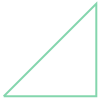

In [5]:
# 外环
polygon.exterior

In [6]:
# 外环坐标
list(polygon.exterior.coords)

[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

In [7]:
# 无内环，因此结果为空
list(polygon.interiors)

[]

### Polygon构造函数也接受LineString和LinearRing实例。

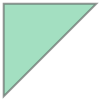

In [8]:
polygon2 = Polygon(LineString([(0, 0), (1, 1), (0, 1)]))
polygon2

# 2.矩形几何要素：

### shapely.box(minx, miny, maxx, maxy, ccw=True)：根据提供的边界框值生成一个矩形的多边形，默认为逆时针顺序。

In [9]:
from shapely import box

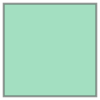

In [10]:
b = box(0,0,1,1)
b

### shapely.geometry.polygon.orient(polygon, sign=1.0)：返回给定多边形正确方向的副本。结果中带符号区域将具有给定的符号。sign为1.0意味着矩形外部环的坐标将是逆时针方向的，内部环（孔）将是顺时针方向的。

In [11]:
import shapely

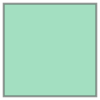

In [12]:
shapely.geometry.polygon.orient(b, sign=1)

In [13]:
list(shapely.geometry.polygon.orient(b, sign=1).exterior.coords)

[(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0)]

In [14]:
list(shapely.geometry.polygon.orient(b, sign=-1).exterior.coords)

[(1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)]

# 3.创建带空洞的面：

In [15]:
hole1 = LinearRing([(1,1) , (2,1) , (2,4) , (1,4)])

hole2 = LinearRing([(3,1) , (3,4) , (4,4)])

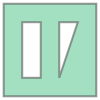

In [16]:
polygon_hole = Polygon([(0,0) , (0,5) , (5,5) , (5,0)] , [hole1 , hole2])
polygon_hole

In [17]:
# 获取面外环中的点坐标
polygon_hole.exterior.coords[:]

[(0.0, 0.0), (0.0, 5.0), (5.0, 5.0), (5.0, 0.0), (0.0, 0.0)]

In [18]:
# 获取面内环的点坐标
polygon_hole.interiors[:]

[<LINEARRING (1 1, 2 1, 2 4, 1 4, 1 1)>, <LINEARRING (3 1, 3 4, 4 4, 3 1)>]

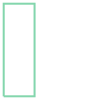

In [19]:
polygon_hole.interiors[0]

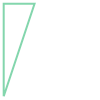

In [20]:
polygon_hole.interiors[1]

In [21]:
# 两个内环都是LinearRing对象
polygon_hole.interiors[0].geom_type

'LinearRing'

### 获取内部空洞的坐标信息

In [22]:
for i in range(len(polygon_hole.interiors)):
    print(polygon_hole.interiors[i].coords[:])

[(1.0, 1.0), (2.0, 1.0), (2.0, 4.0), (1.0, 4.0), (1.0, 1.0)]
[(3.0, 1.0), (3.0, 4.0), (4.0, 4.0), (3.0, 1.0)]


# 4.空要素：

In [23]:
line = LineString()

In [24]:
line.is_empty

True

In [25]:
line.length

0.0

In [26]:
line.bounds

(nan, nan, nan, nan)

In [27]:
list(line.coords)

[]

In [28]:
line.geom_type

'LineString'